In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.insert(0,'../code/functions/')

In [4]:
#get the data to test
data = pickle.load(open('../code/tests/synthDat/realDataRaw_t0.io', 'r'))

In [9]:
def maxNorm(volume):
    toStack = []
    for plane in volume:
        normFactor = (65535./float(np.max(plane)))
        toStack.append(normFactor * np.array(plane))
    return np.stack(toStack)

In [10]:
def meanShiftNorm(volume):
    idealMean = np.average(volume[0])
    return np.stack([plane + (idealMean - np.average(plane)) for plane in volume])


In [11]:
def meanScaleNorm(volume):
    idealMean = np.average(volume[0])
    return np.stack([plane * (float(idealMean)/np.average(plane)) for plane in volume])

In [43]:
def windowMaxNorm(volume, window):
    retStack = []
    rem = volume.shape[0]%window
    for i in range(int(volume.shape[0])/int(window)):
        idealMax = np.max(volume[i])
        retStack.append(volume[i])
        #starts at 1 since ideal mean volume is normed to itself already
        for j in range(1, window):
            retStack.append(volume[i+j]*(idealMax/np.max(volume[i+j])))
    
    #deal with remainders
    idealRemMax = np.max(volume[-rem])
    for i in range(rem):
        retStack.append(volume[-rem+i]*(idealRemMax/np.max(volume[-rem+i])))

    return np.stack(retStack)

In [44]:
def windowMeanShiftNorm(volume, window):
    retStack = []
    rem = volume.shape[0]%window
    for i in range(int(volume.shape[0])/int(window)):
        idealMean = np.average(volume[i])
        retStack.append(volume[i])
        #starts at 1 since ideal mean volume is normed to itself already
        for j in range(1, window):
            retStack.append(volume[i+j]+(idealMean-np.average(volume[i+j])))
    
    #deal with remainders
    idealRemMean = np.average(volume[-rem])
    for i in range(rem):
        retStack.append(volume[-rem+i]+(idealRemMean-np.average(volume[-rem+i])))

    return np.stack(retStack)

In [45]:
def windowMeanScaleNorm(volume, window):
    retStack = []
    rem = volume.shape[0]%window
    for i in range(int(volume.shape[0])/int(window)):
        idealMean = np.average(volume[i])
        retStack.append(volume[i])
        #starts at 1 since ideal mean volume is normed to itself already
        for j in range(1, window):
            retStack.append(volume[i+j]*(idealMean/np.average(volume[i+j])))
    
    #deal with remainders
    idealRemMean = np.average(volume[-rem])
    for i in range(rem):
        retStack.append(volume[-rem+i]*(idealRemMean/np.average(volume[-rem+i])))

    return np.stack(retStack)

In [46]:
maxNormData = maxNorm(data)
meanShiftNormData = meanShiftNorm(data)
meanScaleNormData = meanScaleNorm(data)

wMaxNormData = windowMaxNorm(data, 3)
wMeanShiftNormData = windowMeanShiftNorm(data, 3)
wMeanScaleNormData = windowMeanScaleNorm(data, 3)

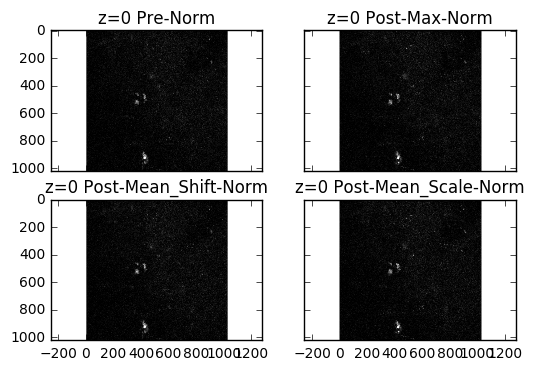

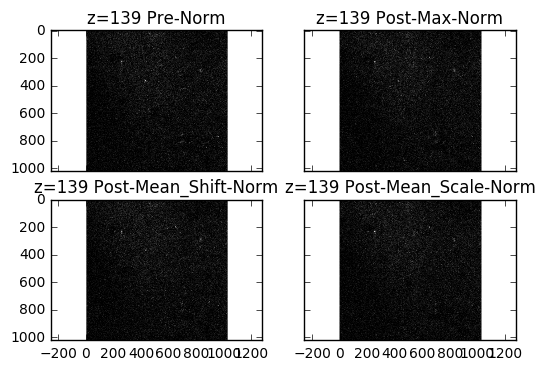

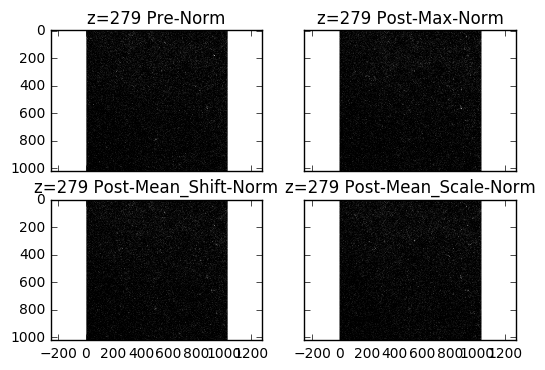

In [29]:
#display 3 slices, one from top, middle, and bottom
sample = [0, 139, 279]
for idx in sample:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
    
    ax1.imshow(data[idx], cmap='gray')
    ax1.set_title('z='+ str(idx)+' Pre-Norm')
    
    ax2.imshow(maxNormData[idx], cmap='gray')
    ax2.set_title('z='+ str(idx)+' Post-Max-Norm')
    
    ax3.imshow(meanShiftNormData[idx], cmap='gray')
    ax3.set_title('z='+ str(idx)+' Post-Mean_Shift-Norm')
    
    ax4.imshow(meanScaleNormData[idx], cmap='gray')
    ax4.set_title('z='+ str(idx)+' Post-Mean_Scale-Norm')
    
    plt.show()

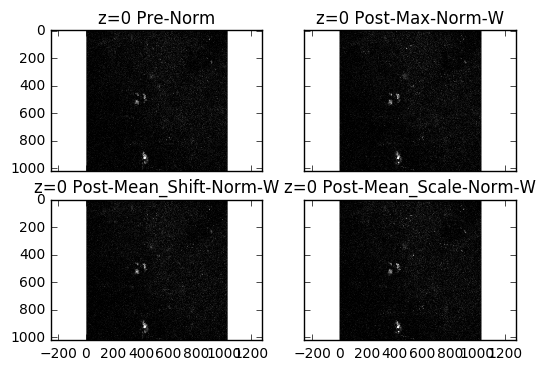

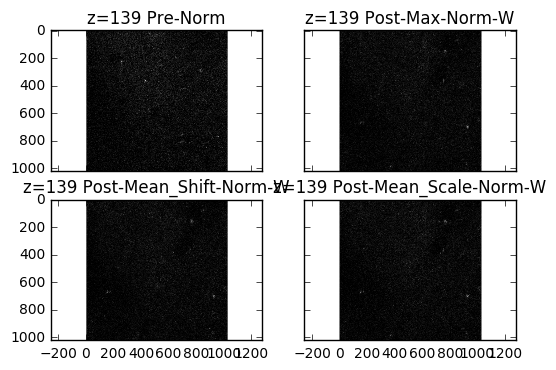

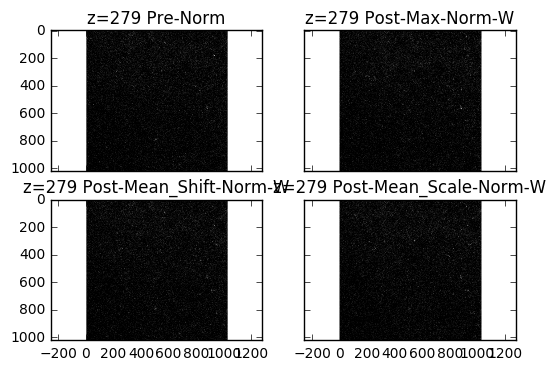

In [48]:
#display 3 slices, one from top, middle, and bottom
sample = [0, 139, 279]
for idx in sample:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
    
    ax1.imshow(data[idx], cmap='gray')
    ax1.set_title('z='+ str(idx)+' Pre-Norm')
    
    ax2.imshow(wMaxNormData[idx], cmap='gray')
    ax2.set_title('z='+ str(idx)+' Post-Max-Norm-W')
    
    ax3.imshow(wMeanShiftNormData[idx], cmap='gray')
    ax3.set_title('z='+ str(idx)+' Post-Mean_Shift-Norm-W')
    
    ax4.imshow(wMeanScaleNormData[idx], cmap='gray')
    ax4.set_title('z='+ str(idx)+' Post-Mean_Scale-Norm-W')
    
    plt.show()

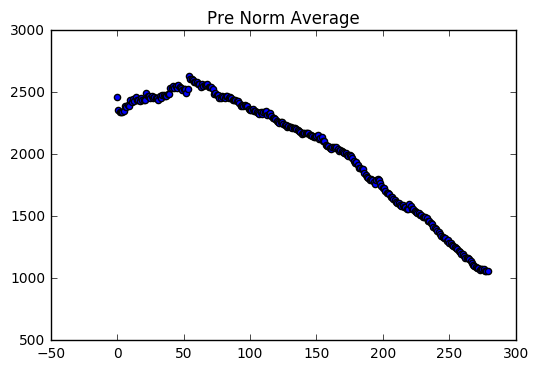

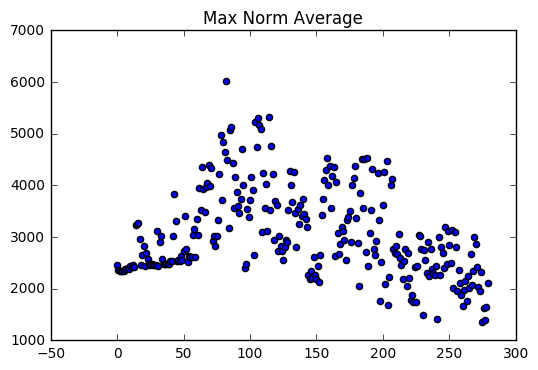

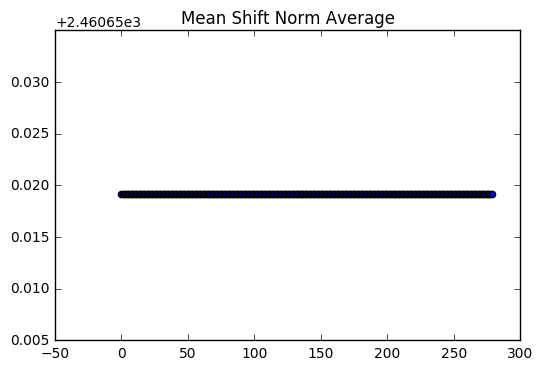

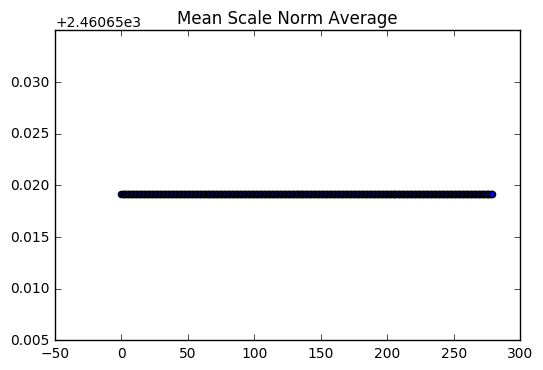

In [33]:
#Generate a line graph of average intensity in each slice, before and after norm
rawValList = [np.average(plane) for plane in data]
maxNormValList = [np.average(plane) for plane in maxNormData]
meanShiftNormValList = [np.average(plane) for plane in meanShiftNormData]
meanScaleNormValList = [np.average(plane) for plane in meanScaleNormData]

fig = plt.figure()
plt.scatter(np.arange(len(rawValList)), rawValList)
plt.title('Pre Norm Average')

fig = plt.figure()
plt.scatter(np.arange(len(rawValList)), maxNormValList)
plt.title('Max Norm Average')

fig = plt.figure()
plt.scatter(np.arange(len(rawValList)), meanShiftNormValList)
plt.title('Mean Shift Norm Average')

fig = plt.figure()
plt.scatter(np.arange(len(rawValList)), meanScaleNormValList)
plt.title('Mean Scale Norm Average')

plt.show()

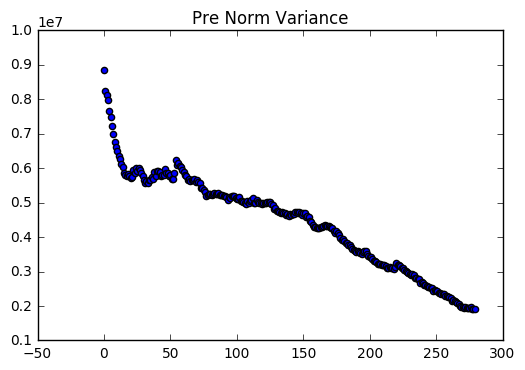

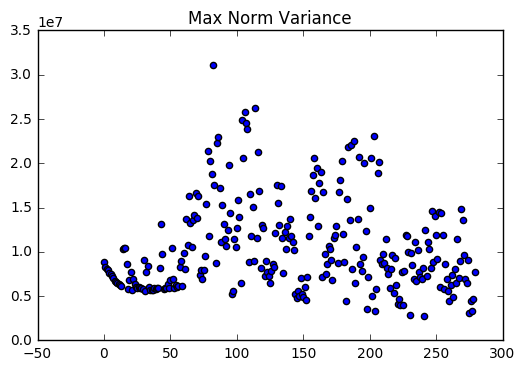

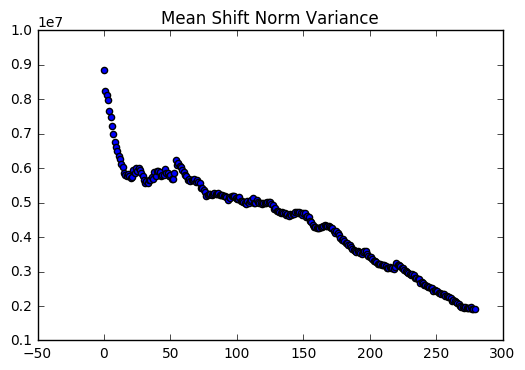

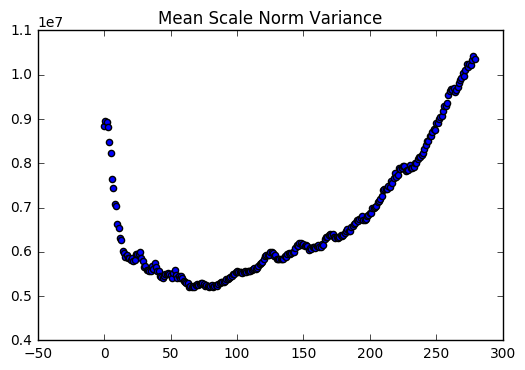

In [34]:
#Generate a line graph of average Variance in each slice, before and after norm
rawValList = [np.var(plane) for plane in data]
maxNormValList = [np.var(plane) for plane in maxNormData]
meanShiftNormValList = [np.var(plane) for plane in meanShiftNormData]
meanScaleNormValList = [np.var(plane) for plane in meanScaleNormData]

fig = plt.figure()
plt.scatter(np.arange(len(rawValList)), rawValList)
plt.title('Pre Norm Variance')

fig = plt.figure()
plt.scatter(np.arange(len(rawValList)), maxNormValList)
plt.title('Max Norm Variance')

fig = plt.figure()
plt.scatter(np.arange(len(rawValList)), meanShiftNormValList)
plt.title('Mean Shift Norm Variance')

fig = plt.figure()
plt.scatter(np.arange(len(rawValList)), meanScaleNormValList)
plt.title('Mean Scale Norm Variance')

plt.show()

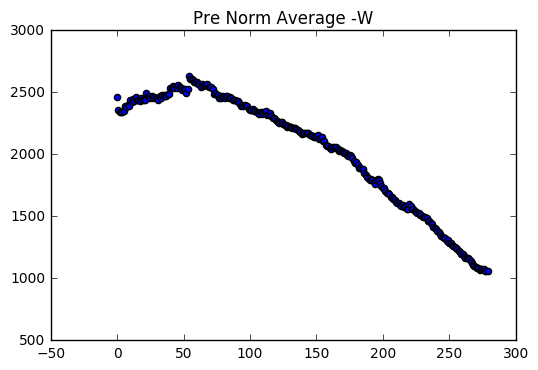

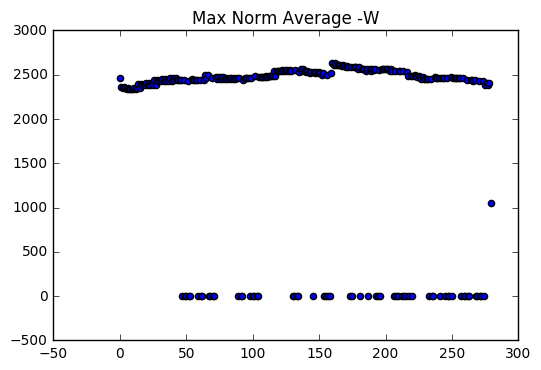

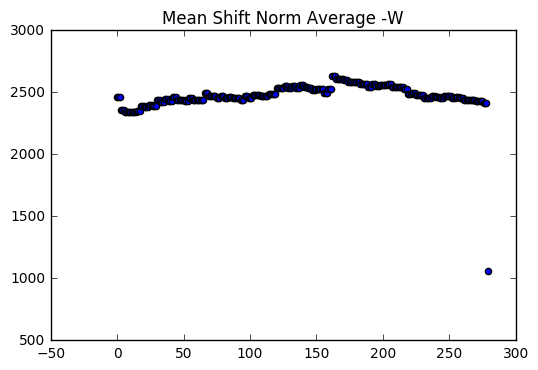

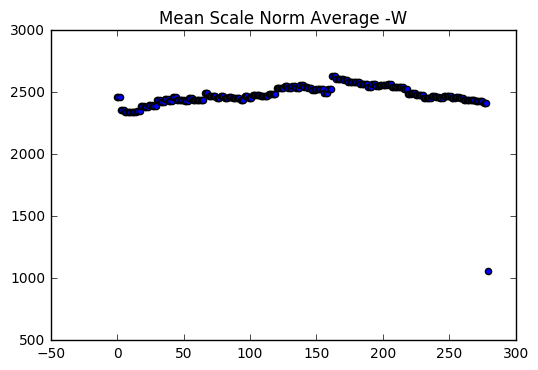

In [51]:
#Generate a line graph of average intensity in each slice, before and after norm
rawValList = [np.average(plane) for plane in data]
wMaxNormValList = [np.average(plane) for plane in wMaxNormData]
wMeanShiftNormValList = [np.average(plane) for plane in wMeanShiftNormData]
wMeanScaleNormValList = [np.average(plane) for plane in wMeanScaleNormData]

fig = plt.figure()
plt.scatter(np.arange(len(rawValList)), rawValList)
plt.title('Pre Norm Average -W')

fig = plt.figure()
plt.scatter(np.arange(len(rawValList)), wMaxNormValList)
plt.title('Max Norm Average -W')

fig = plt.figure()
plt.scatter(np.arange(len(rawValList)), wMeanShiftNormValList)
plt.title('Mean Shift Norm Average -W')

fig = plt.figure()
plt.scatter(np.arange(len(rawValList)), wMeanScaleNormValList)
plt.title('Mean Scale Norm Average -W')

plt.show()

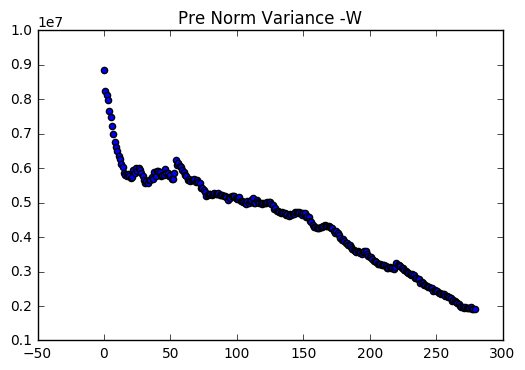

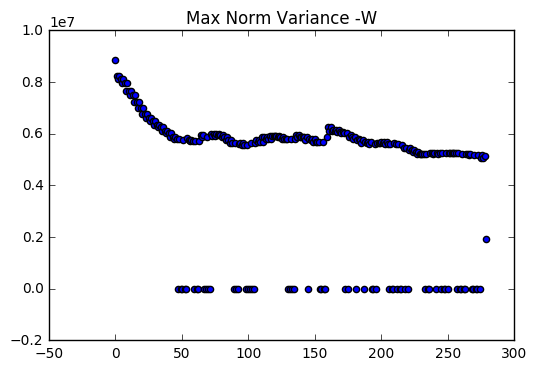

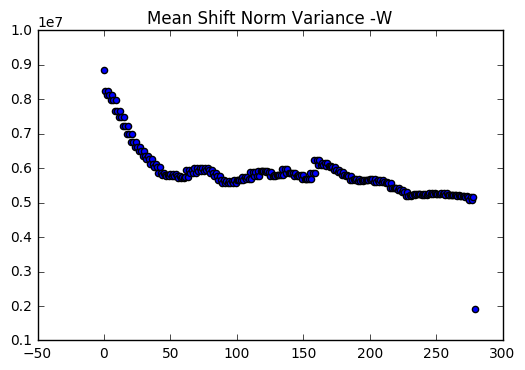

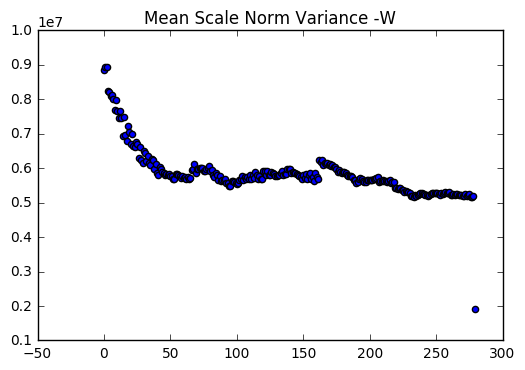

In [52]:
#Generate a line graph of average Variance in each slice, before and after norm
rawValList = [np.var(plane) for plane in data]
wMaxNormValList = [np.var(plane) for plane in wMaxNormData]
wMeanShiftNormValList = [np.var(plane) for plane in wMeanShiftNormData]
wMeanScaleNormValList = [np.var(plane) for plane in wMeanScaleNormData]

fig = plt.figure()
plt.scatter(np.arange(len(rawValList)), rawValList)
plt.title('Pre Norm Variance -W')

fig = plt.figure()
plt.scatter(np.arange(len(rawValList)), wMaxNormValList)
plt.title('Max Norm Variance -W')

fig = plt.figure()
plt.scatter(np.arange(len(rawValList)), wMeanShiftNormValList)
plt.title('Mean Shift Norm Variance -W')

fig = plt.figure()
plt.scatter(np.arange(len(rawValList)), wMeanScaleNormValList)
plt.title('Mean Scale Norm Variance -W')

plt.show()

In [53]:
w5MeanShiftNormData = windowMeanShiftNorm(data, 5)
w5MeanScaleNormData = windowMeanScaleNorm(data, 5)

w7MeanShiftNormData = windowMeanShiftNorm(data, 7)
w7MeanScaleNormData = windowMeanScaleNorm(data, 7)

In [62]:
w3MeanShiftNormValList = [np.average(plane) for plane in wMeanShiftNormData]
w5MeanShiftNormValList = [np.average(plane) for plane in w5MeanShiftNormData]
w7MeanShiftNormValList = [np.average(plane) for plane in w7MeanShiftNormData]

w3MeanScaleNormValList = [np.average(plane) for plane in wMeanScaleNormData]
w5MeanScaleNormValList = [np.average(plane) for plane in w5MeanScaleNormData]
w7MeanScaleNormValList = [np.average(plane) for plane in w7MeanScaleNormData]

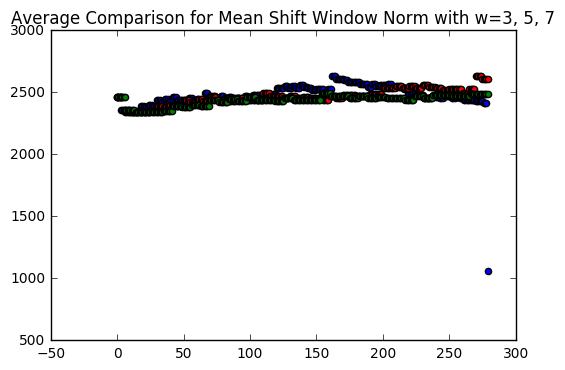

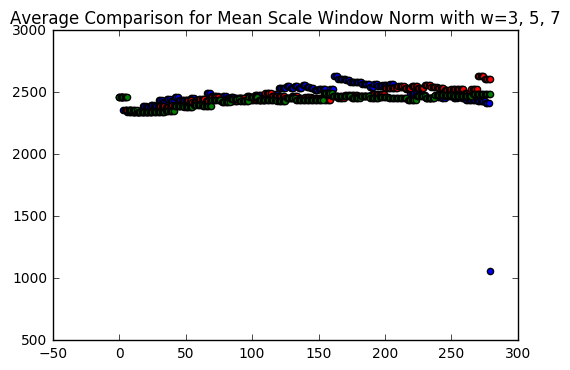

In [65]:
x = np.arange(len(rawValList))

fig = plt.figure()
plt.scatter(x, w3MeanShiftNormValList, c='b')
plt.scatter(x, w5MeanShiftNormValList, c='r')
plt.scatter(x, w7MeanShiftNormValList, c='g')
plt.title('Average Comparison for Mean Shift Window Norm with w=3, 5, 7')

fig = plt.figure()
plt.scatter(x, w3MeanScaleNormValList, c='b')
plt.scatter(x, w5MeanScaleNormValList, c='r')
plt.scatter(x, w7MeanScaleNormValList, c='g')
plt.title('Average Comparison for Mean Scale Window Norm with w=3, 5, 7')

plt.show()

In [66]:
w3MeanShiftNormValList = [np.var(plane) for plane in wMeanShiftNormData]
w5MeanShiftNormValList = [np.var(plane) for plane in w5MeanShiftNormData]
w7MeanShiftNormValList = [np.var(plane) for plane in w7MeanShiftNormData]

w3MeanScaleNormValList = [np.var(plane) for plane in wMeanScaleNormData]
w5MeanScaleNormValList = [np.var(plane) for plane in w5MeanScaleNormData]
w7MeanScaleNormValList = [np.var(plane) for plane in w7MeanScaleNormData]

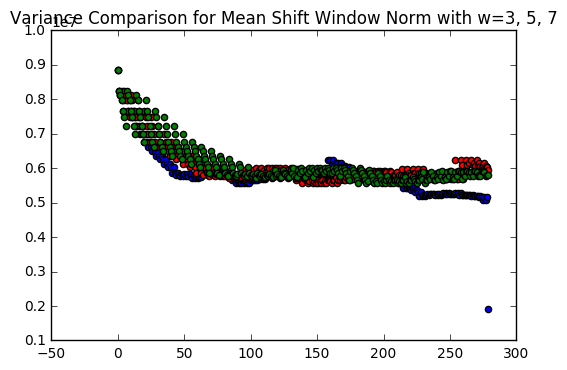

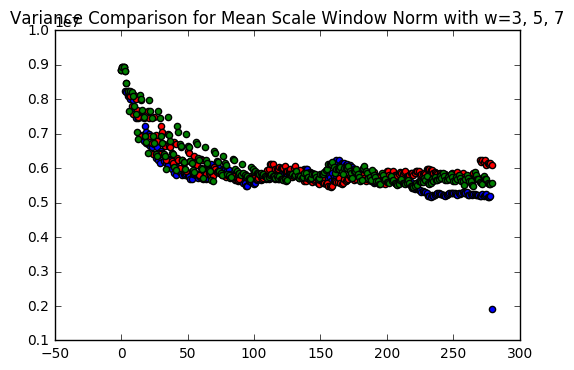

In [67]:
x = np.arange(len(rawValList))

fig = plt.figure()
plt.scatter(x, w3MeanShiftNormValList, c='b')
plt.scatter(x, w5MeanShiftNormValList, c='r')
plt.scatter(x, w7MeanShiftNormValList, c='g')
plt.title('Variance Comparison for Mean Shift Window Norm with w=3, 5, 7')

fig = plt.figure()
plt.scatter(x, w3MeanScaleNormValList, c='b')
plt.scatter(x, w5MeanScaleNormValList, c='r')
plt.scatter(x, w7MeanScaleNormValList, c='g')
plt.title('Variance Comparison for Mean Scale Window Norm with w=3, 5, 7')

plt.show()